In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/dakshit9228/Makeover-Monday/main/1976-2020-president.csv'
data = pd.read_csv(url)
data_info = {
    'columns': data.columns.tolist(),
    'num_observations': len(data),
    'num_variables': len(data.columns),
}
sample_data = data.head()
print("Dataset Info:")
print(f"Number of observations: {data_info['num_observations']}")
print(f"Number of variables: {data_info['num_variables']}")
print(f"Columns: {data_info['columns']}")
print("\nSample Data:")
print(sample_data)


Dataset Info:
Number of observations: 4287
Number of variables: 15
Columns: ['year', 'state', 'state_po', 'state_fips', 'state_cen', 'state_ic', 'office', 'candidate', 'party_detailed', 'writein', 'candidatevotes', 'totalvotes', 'version', 'notes', 'party_simplified']

Sample Data:
   year    state state_po  state_fips  state_cen  state_ic        office  \
0  1976  ALABAMA       AL           1         63        41  US PRESIDENT   
1  1976  ALABAMA       AL           1         63        41  US PRESIDENT   
2  1976  ALABAMA       AL           1         63        41  US PRESIDENT   
3  1976  ALABAMA       AL           1         63        41  US PRESIDENT   
4  1976  ALABAMA       AL           1         63        41  US PRESIDENT   

                 candidate              party_detailed writein  \
0            CARTER, JIMMY                    DEMOCRAT   False   
1             FORD, GERALD                  REPUBLICAN   False   
2           MADDOX, LESTER  AMERICAN INDEPENDENT PARTY   False

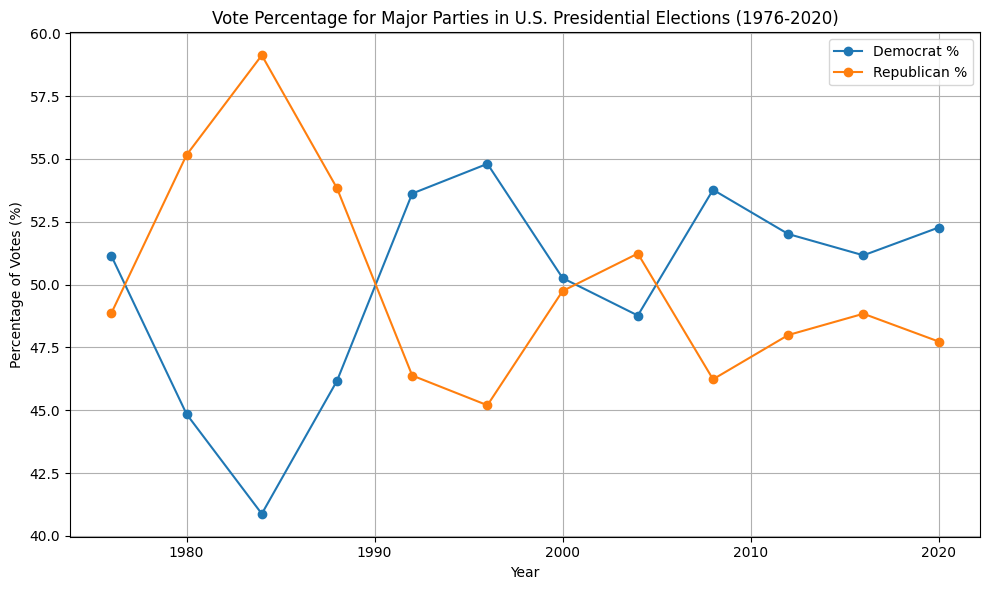

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'https://raw.githubusercontent.com/dakshit9228/Makeover-Monday/main/1976-2020-president.csv'
data = pd.read_csv(file_path)
major_parties = data[data['party_simplified'].isin(['DEMOCRAT', 'REPUBLICAN'])]
grouped_data = major_parties.groupby(['year', 'party_simplified'])['candidatevotes'].sum().unstack()
grouped_data['Total Votes'] = grouped_data.sum(axis=1)
grouped_data['DEMOCRAT_pct'] = (grouped_data['DEMOCRAT'] / grouped_data['Total Votes']) * 100
grouped_data['REPUBLICAN_pct'] = (grouped_data['REPUBLICAN'] / grouped_data['Total Votes']) * 100
plt.figure(figsize=(10, 6))
plt.plot(grouped_data.index, grouped_data['DEMOCRAT_pct'], label='Democrat %', marker='o')
plt.plot(grouped_data.index, grouped_data['REPUBLICAN_pct'], label='Republican %', marker='o')
plt.title('Vote Percentage for Major Parties in U.S. Presidential Elections (1976-2020)')
plt.xlabel('Year')
plt.ylabel('Percentage of Votes (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
